Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos auto mpg perteneciente a la libreria seaborn

Objetivo: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un Gráfico de dispersión

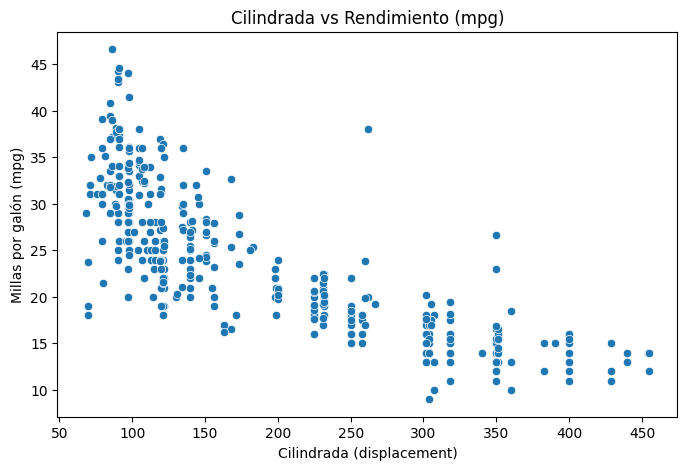

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset auto mpg
df = sns.load_dataset("mpg").dropna()

# Gráfico de dispersión: cilindrada vs. rendimiento (mpg)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="displacement", y="mpg")
plt.title("Cilindrada vs Rendimiento (mpg)")
plt.xlabel("Cilindrada (displacement)")
plt.ylabel("Millas por galón (mpg)")
plt.show()

2) (1 punto) Investigar e incluir un grafico de correlacion (Correlation Plot) para visualizar la dependencia entre los datos


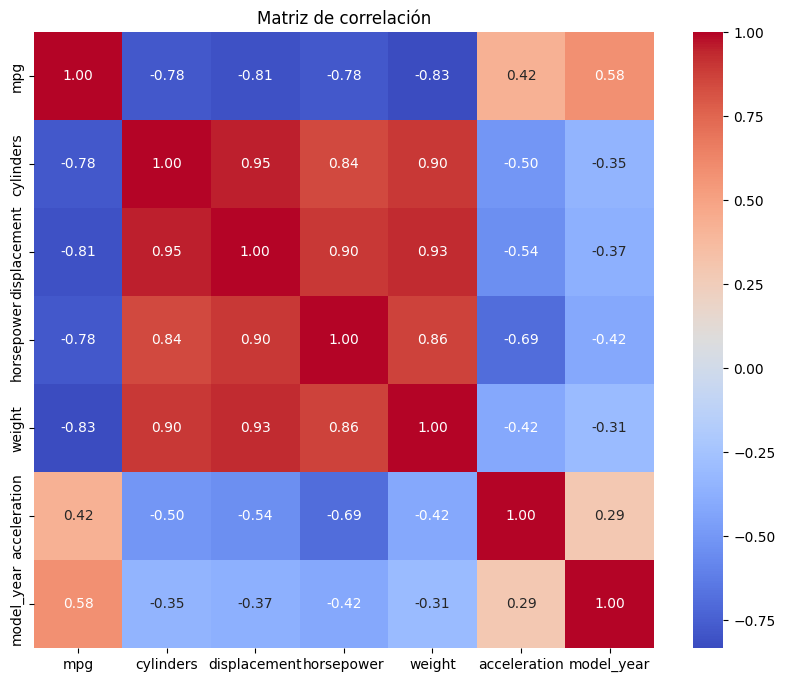

In [2]:
import numpy as np

# Matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Gráfico de correlación con mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


3) (1 punto) Entrenar un modelo de regresion lineal

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Usaremos la variable más correlacionada con mpg (según el paso 2)
X = df[["weight"]]
y = df["mpg"]

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 17.69
Coeficiente de determinación (R²): 0.65


5) (1 punto) Mostrar graficamente la lineas rectas en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.

Text(0.5, 0, 'Peso')

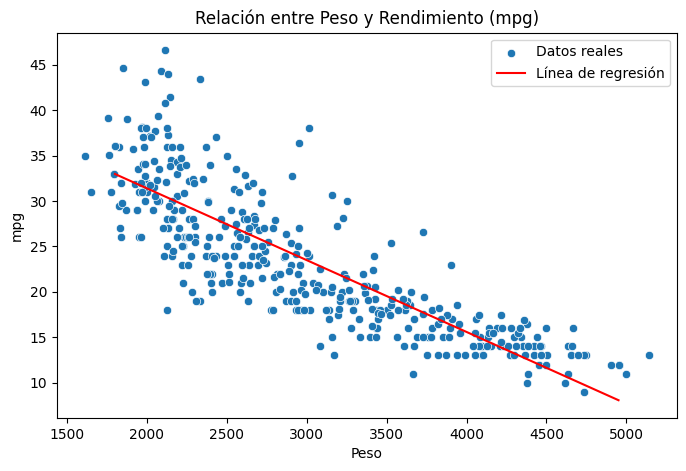

In [5]:
# Según el heatmap, 'weight' y 'mpg' tienen alta correlación negativa
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["weight"], y=df["mpg"], label="Datos reales")
sns.lineplot(x=X_test["weight"], y=y_pred, color="red", label="Línea de regresión")
plt.title("Relación entre Peso y Rendimiento (mpg)")
plt.xlabel("Peso")
